In [0]:
# non linear SVR regression
# based on libsvm
# class sklearn.svm.LinearSVR()

In [0]:
# Lib preparation
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection, svm

In [0]:
# diabetes dataset extraction, for regression problem
# diabetes dataset, 442 samples, 10 features(all numeric floats), the label is between integer 25 ~ 346

def load_data_regression():
  diabetes = datasets.load_diabetes()
  return model_selection.train_test_split(diabetes.data, diabetes.target, test_size=.25, random_state=0)

In [0]:
# iris dataset, for classification problem
# 150 dps, 3 classes, 4 features
# we use stratified sampling here, since samples ordered by y_train, the first 50 samples are of label 0 and the later 50 are of label 1
def load_data_classification():
  iris = datasets.load_iris()
  return model_selection.train_test_split(iris.data, iris.target, test_size=.25, random_state=0, stratify=iris.target)

In [0]:
## Params
# C: penalty
# kernel: 'linear' means K(x,z)=x dot z; 'poly' means k(x,z)=(y(x dot z +1)+r)^p; 'rbf': default value means gaussian k(x,z)=exp(-y||x-z||^2), y depends on gamma coefficient; 'sigmoid' means k(x,z) = tanh(y(x dot z)+r), y depends gamma, r depends on coef theta; 'precomputed' means providing kernel matrix, or a callable, to compute kernel matrix
# degree: a integer, when poly, this is the coefficient p. Will be not used for other kernel funcs
# gamma: float, the coefficient when the kernel is 'rbf' or 'poly' or 'sigmoid', if 'auto', means the gamma is 1/n_features
# coef0: float, the noise r in kernel function
# shrinking: bool, True then use shrinking heuristic
# tol: float, threshold to quit iterations
# cache_size: float, assign the size of kernel cache, unit is MB
# class_weight: a dict or a string 'balanced', for the weight of every class, if not given, the weight of the class is 1
# verbose: integer for beginning verbose output
# random_state: integer or RandomState instance or None
# max_iter: a integer, the max times of iteration

## Attributes
# support_: array, shape is [n_SV], for support vectors
# support_vectors_: array, [n_SV, n_features]
# n_support_: array-like, shape could be [n_class], the number of sv for every class
# dual_coef_: an array, shape is -n_class-1, n_SV, when dual, the coefficients of every SV
# coef_: [n_class-1, n_features], the coefficient of each feature on orginal problem, it only works at linear kernel
# intercept_: array for intercept, as constant one in decision func
# 
## Methods
# fit(X,y)
# predict(X)
# score(X,y), return 1 - sum of (predicted y - real y)^2 / (real y - mean value of y), the score is from -infinite to 1, the bigger is the better

In [0]:

# test linear kernel
def test_SVR_linear(*data):
  X_train, X_test, y_train, y_test = data
  regr = svm.SVR(kernel='linear')
  regr.fit(X_train, y_train)
  print('Coef:%s, intercept %s'%(regr.coef_,regr.intercept_))
  print('Score:%.2f'%regr.score(X_test, y_test))

In [0]:
X_train, X_test, y_train, y_test = load_data_regression()
test_SVR_linear(X_train, X_test, y_train, y_test)# score is okay, -.03

Coef:[[ 2.24127622 -0.38128702  7.87018376  5.21134024  2.26619436  1.70869458
  -5.7746489   5.51487251  7.94856847  4.59359657]], intercept [137.11011179]
Score:-0.03


In [0]:
# test poly kernel
def test_SVR_poly(*data):
  X_train, X_test, y_train, y_test = data
  fig=plt.figure()
  degrees=range(1,20)
  train_scores=[]
  test_scores=[]
  # test degrees
  for degree in degrees:
    regr = svm.SVR(kernel='poly',degree=degree, coef0=1)
    regr.fit(X_train, y_train)
    train_scores.append(regr.score(X_train, y_train))
    test_scores.append(regr.score(X_test,y_test))
  fig=plt.figure()
  ax=fig.add_subplot(1,3,1)
  ax.plot(degrees, train_scores, label='Training_score', marker='+')
  ax.plot(degrees, test_scores, label='Testing_score', marker='o')
  ax.set_xlabel('p')
  ax.set_ylabel('score')
  ax.set_ylim(0,1.05)
  ax.set_title('SVR_Poly_degree')
  ax.legend(loc='best',framealpha=.5)
  # test gamma
  gammas=range(1,40)
  train_scores=[]
  test_scores=[]
  for gamma in gammas:
    regr = svm.SVR(kernel='poly',degree=3, gamma=gamma,coef0=1)
    regr.fit(X_train, y_train)
    train_scores.append(regr.score(X_train, y_train))
    test_scores.append(regr.score(X_test,y_test))
  ax=fig.add_subplot(1,3,2)
  ax.plot(gammas, train_scores, label='Training_score', marker='+')
  ax.plot(gammas, test_scores, label='Testing_score', marker='o')
  ax.set_xlabel(r'$\gamma$')
  ax.set_ylabel('score')
  ax.set_ylim(-1,1)
  ax.set_title('SVR_Poly_gamma')
  ax.legend(loc='best',framealpha=.5)
  # test r
  rs=range(0,20)
  train_scores=[]
  test_scores=[]
  for r in rs:
    regr = svm.SVR(kernel='poly',degree=3, gamma=20,coef0=r)
    regr.fit(X_train, y_train)
    train_scores.append(regr.score(X_train, y_train))
    test_scores.append(regr.score(X_test,y_test))
  ax=fig.add_subplot(1,3,3)
  ax.plot(rs, train_scores, label='Training_score', marker='+')
  ax.plot(rs, test_scores, label='Testing_score', marker='o')
  ax.set_xlabel(r'r')
  ax.set_ylabel('score')
  ax.set_ylim(0,1.05)
  ax.set_title('SVR_Poly_r')
  ax.legend(loc='best',framealpha=.5)
  plt.show()

<Figure size 432x288 with 0 Axes>

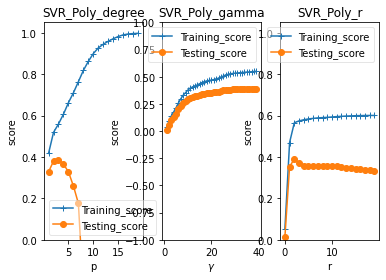

In [0]:
X_train, X_test, y_train, y_test = load_data_regression()
test_SVR_poly(X_train, X_test, y_train, y_test)

In [0]:
# now consider gaussian kernel, gamma
def test_SVR_rbf(*data):
  X_train, X_test, y_train, y_test = data
  fig=plt.figure()
  train_scores=[]
  test_scores=[]
  # test gamma
  gammas=range(1,20)
  train_scores=[]
  test_scores=[]
  for gamma in gammas:
    regr = svm.SVR(kernel='rbf',gamma=gamma)
    regr.fit(X_train, y_train)
    train_scores.append(regr.score(X_train, y_train))
    test_scores.append(regr.score(X_test,y_test))
  ax=fig.add_subplot(1,1,1)
  ax.plot(gammas, train_scores, label='Training_score', marker='+')
  ax.plot(gammas, test_scores, label='Testing_score', marker='o')
  ax.set_xlabel(r'$\gamma$')
  ax.set_ylabel('score')
  ax.set_ylim(-1,1)
  ax.set_title('SVR_Gaussian_gamma')
  ax.legend(loc='best',framealpha=.5)
  plt.show()

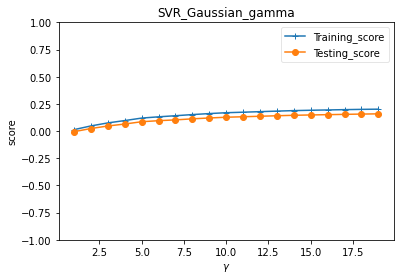

In [0]:
X_train, X_test, y_train, y_test = load_data_regression()
test_SVR_rbf(X_train, X_test, y_train, y_test) # the impact from changing gamma is small

In [0]:
# test sigmoid kernel
def test_SVR_sigmoid(*data):
  X_train, X_test, y_train, y_test = data
  fig=plt.figure()
  # test gamma
  gammas=np.logspace(-1,3)
  train_scores=[]
  test_scores=[]
  for gamma in gammas:
    regr = svm.SVR(kernel='sigmoid',gamma=gamma,coef0=0.01)
    regr.fit(X_train, y_train)
    train_scores.append(regr.score(X_train, y_train))
    test_scores.append(regr.score(X_test,y_test))
  ax=fig.add_subplot(1,2,1)
  ax.plot(gammas, train_scores, label='Training_score', marker='+')
  ax.plot(gammas, test_scores, label='Testing_score', marker='o')
  ax.set_xlabel(r'$\gamma$')
  ax.set_ylabel('score')
  ax.set_ylim(-1,1)
  ax.set_title('SVR_sigmoid_gamma')
  ax.legend(loc='best',framealpha=.5)
  # test r
  rs=range(0,20)
  train_scores=[]
  test_scores=[]
  for r in rs:
    regr = svm.SVR(kernel='sigmoid',gamma=20,coef0=r)
    regr.fit(X_train, y_train)
    train_scores.append(regr.score(X_train, y_train))
    test_scores.append(regr.score(X_test,y_test))
  ax=fig.add_subplot(1,2,2)
  ax.plot(rs, train_scores, label='Training_score', marker='+')
  ax.plot(rs, test_scores, label='Testing_score', marker='o')
  ax.set_xlabel(r'r')
  ax.set_ylabel('score')
  ax.set_ylim(-1,1)
  ax.set_title('SVR_sigmoid_r')
  ax.legend(loc='best',framealpha=.5)
  plt.show()

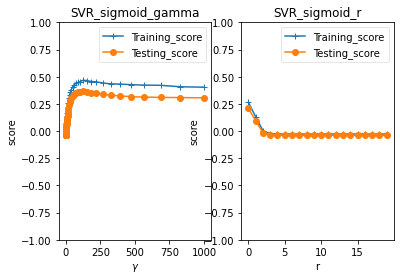

In [0]:
X_train, X_test, y_train, y_test = load_data_regression()
test_SVR_sigmoid(X_train, X_test, y_train, y_test)